<center>

# treadmills-for-life-an-aerofit-review-session.ipynb

<img src="https://content3.jdmagicbox.com/comp/bangalore/y7/080pxx80.xx80.220325120005.l5y7/catalogue/aerofit-jalahalli-cross-bangalore-treadmill-repair-and-services-hilj1rrfab.jpg" height="50%">

**Treadmills for LIFE- An Aerofit review session**

</center>




In [ ]:
import pandas as pd
df=pd.read_csv('https://gist.github.com/singhsidhukuldeep/b5e23228306ff9d6e40c82949da8e0f7/raw/d82dd889dcfbd0cd027f3b620a6798453c65ff6b/aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# very less amount of data
df.shape

(180, 9)

In [ ]:
# no null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# income age miles are hinting outliers # can also use boxplot to confirm
## drop? No small data
## cap>>   25%-1.5IQR to  75%+1.5IQR
## mostly will use with grouping>> we can leave
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# logical
# what is the most important feature
# income >> education >> age

In [ ]:
# EDA
## Bi

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='Income'>

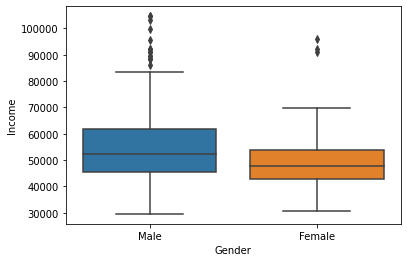

In [ ]:
# males have more income than females?
sns.boxplot(x = "Gender", y="Income", data=df)

In [ ]:
#  >> huge overlap>> will use this in walmart case study
# 95% conf>>>
# male >> 30k--80k
# female >> 30k--70k

<AxesSubplot:xlabel='Gender', ylabel='Income'>

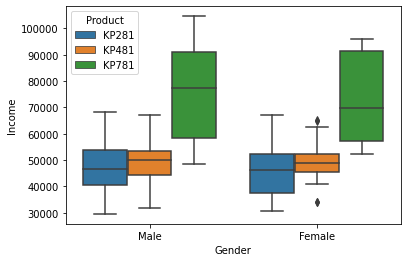

In [ ]:
sns.boxplot(x = "Gender", y="Income", data=df, hue='Product')

In [ ]:
# high income>> means best profuct???
## KP781 is the best seller in high incomes

In [ ]:
df.groupby(['Gender', 'Product'])['Income'].describe()

count          mean           std      min       25%      50%  \
Gender Product                                                                  
Female KP281     40.0  46020.075000   9226.214704  30699.0  37521.00  46048.5   
       KP481     29.0  49336.448276   7984.486277  34110.0  45480.00  48891.0   
       KP781      7.0  73633.857143  19009.925227  52291.0  57271.00  69721.0   
Male   KP281     40.0  46815.975000   9022.407705  29562.0  40647.75  46617.0   
       KP481     31.0  48634.258065   9356.202876  31836.0  44343.00  50028.0   
       KP781     33.0  75825.030303  18675.002521  48556.0  58516.00  77191.0   

                     75%       max  
Gender Product                      
Female KP281    52302.00   67083.0  
       KP481    52302.00   65220.0  
       KP781    91508.50   95866.0  
Male   KP281    53723.25   68220.0  
       KP481    53439.00   67083.0  
       KP781    90886.00  104581.0

<AxesSubplot:xlabel='Education', ylabel='Age'>

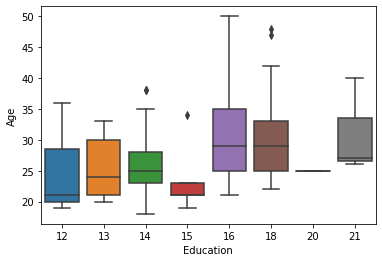

In [ ]:
# higher age means more education?
sns.boxplot(x = "Education", y="Age", data=df)

<AxesSubplot:xlabel='Education', ylabel='Income'>

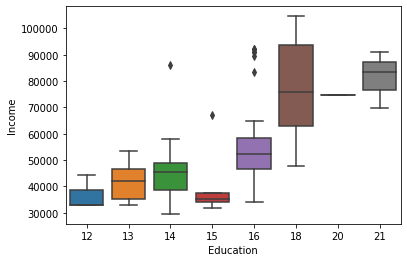

In [ ]:
# # higher education means more income?
sns.boxplot(x = "Education", y="Income", data=df)

<AxesSubplot:xlabel='Miles', ylabel='Income'>

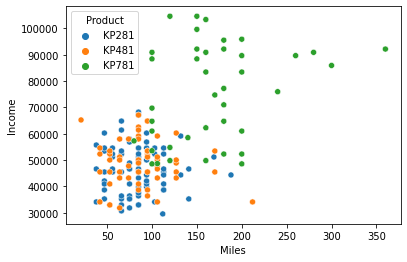

In [ ]:

sns.scatterplot(x='Miles', y='Income', data=df, hue='Product')

In [ ]:
## insights
# 1>> more miles>>KP781
# 2>> more income>>KP781
# 3>> huge overlap, between product 281, 481 and miles, income

<AxesSubplot:>

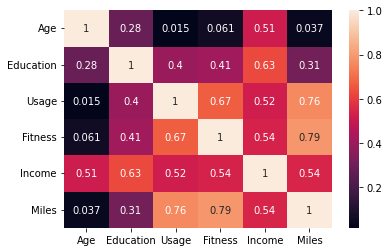

In [ ]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

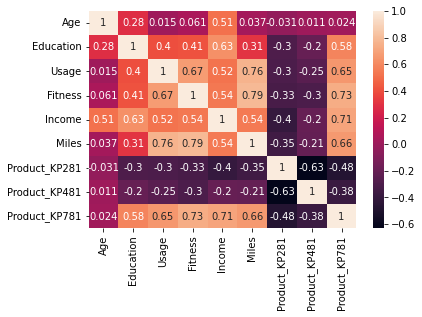

In [ ]:
df_new = pd.get_dummies(df, columns=['Product']) # one hot encode
sns.heatmap(df_new.corr(), annot=True)

In [ ]:
#### EDA IS DONE ####

In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
# prob

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [ ]:
# get probabilites? divide buy total like value_counts
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000


In [ ]:
# marginal/ joint/ conditional??
# prob>> Female & KP281>> 40/180 (joint)>>>0.222222
# prob>> Female>> 76/180 (marginal) >>> 0.422222

In [ ]:
# prob>> given customer is female, they buy 781>> 7/76 >> 0.09210526315789473 # condn prob

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [ ]:
# prob>> given customer buy 781, they are female>> 7/40 >>.175

In [ ]:
pd.crosstab(index=df['Gender'], columns=df['Product'], margins=True, normalize='columns')

Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.5,0.483333,0.175,0.422222
Male,0.5,0.516667,0.825,0.577778
